In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("/Users/aditigarg/Downloads/test.csv")

# Print column names
print("Columns:", df.columns.tolist())

# Show first few rows
print("\nFirst few rows:\n", df.head())

# Show how many NaNs in each column
print("\nNaN counts:\n", df.isna().sum())


Columns: ['text', 'label']

First few rows:
                                                 text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0

NaN counts:
 text     0
label    0
dtype: int64


In [2]:
df.columns = df.columns.str.strip()  # Removes extra spaces from column names


In [3]:
# Ensure 'text' and 'label' exist
assert 'text' in df.columns and 'label' in df.columns, "Missing 'text' or 'label' column"

# Drop rows with NaNs or empty text
df = df.dropna(subset=['text', 'label'])
df['text'] = df['text'].astype(str).str.strip()
df = df[df['text'] != '']

# Optional: see how many are left
print(f"Remaining rows after cleaning: {len(df)}")

# Final feature and label
X = df['text']
y = df['label']


Remaining rows after cleaning: 2000


In [4]:
if len(X) == 0:
    raise ValueError("No valid text data left after cleaning.")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = model.predict(X_test)

# Step 3: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5975

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       124
           1       0.53      0.97      0.68       131
           2       0.00      0.00      0.00        35
           3       0.77      0.19      0.31        52
           4       0.71      0.23      0.35        43
           5       0.00      0.00      0.00        15

    accuracy                           0.60       400
   macro avg       0.45      0.36      0.34       400
weighted avg       0.57      0.60      0.52       400


Confusion Matrix:
 [[ 92  30   0   1   1   0]
 [  3 127   0   0   1   0]
 [ 11  24   0   0   0   0]
 [ 11  30   0  10   1   0]
 [ 11  21   0   1  10   0]
 [  4   9   0   1   1   0]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [7]:
def predict_sentiment(texts):
    vect_texts = vectorizer.transform(texts)
    return model.predict(vect_texts)

samples = ["I am so happy today!", "This is really bad."]
print(predict_sentiment(samples))



[1 0]


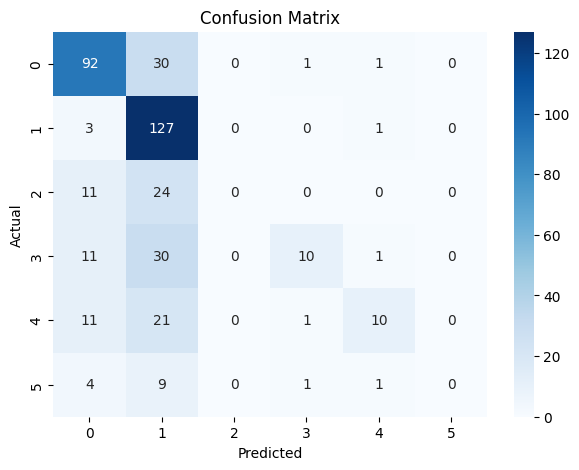

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
